In [1]:
import pandas
import seaborn


## For each algorithm 
1. Load output data
2. Trosform to a feature matrix (by sample)
3. merge all features in one df

### Load Clinical data

In [2]:
clinical = pandas.read_csv('../../../Data/CODEX_CTCL/41467_2021_26974_MOESM3_ESM_-_Objects.csv',index_col=0).loc[:,['FileName','Groups','Patients']].reset_index()
# display(clinical)
# display(clinical.loc[:,['FileName','Groups','Patients']])
Annot = clinical.loc[:,['FileName','Groups','Patients']].drop_duplicates()
Annot.index = Annot['FileName']

display(Annot)

,FileName,Groups,Patients
FileName,,,
reg001,reg001,1,1
reg002,reg002,1,1
reg006,reg006,1,2
reg035,reg035,1,9
reg036,reg036,1,9
...,...,...,...
reg005,reg005,1,2
reg018,reg018,1,5
reg027,reg027,4,7


### Stagate

In [7]:
stagate_df = pandas.read_csv('~/Data/CODEX_CTCL/stitched_samples_Lovain_Phillips_Stagate.csv', index_col=0)
display(stagate_df.head())
stagate = stagate_df.loc[:,['FileName','Louvain']]
stagate_count = pandas.DataFrame(stagate.value_counts().reset_index())
stagate_count = stagate_count.pivot_table(index='Louvain', columns='FileName', values = 'count').fillna(0)
stagate_count.sample()
seaborn.clustermap(stagate_count.fillna(0), col_colors=row_colors)

,x,y,Louvain,cell_types,Count,FileName,Patients,Groups,x_offset,y_offset
0,335165,979,12,B cells,0,reg001,1,1,335000,0.0
1,335219,859,2,B cells,1,reg001,1,1,335000,0.0
2,335328,1105,10,B cells,2,reg001,1,1,335000,0.0
3,335422,120,2,B cells,3,reg001,1,1,335000,0.0
4,335415,870,2,B cells,4,reg001,1,1,335000,0.0


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x1000 with 0 Axes>

In [8]:
stagate_count.index = "Stagete_Niche" + stagate_count.index.astype(str)
stagate_count.head()


FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
Louvain,,,,,,,,,,,,,,,,,,,,,
Stagete_Niche0,322.0,481.0,231.0,207.0,83.0,155.0,79.0,287.0,63.0,193.0,...,18.0,1.0,24.0,33.0,536.0,283.0,35.0,70.0,537.0,301.0
Stagete_Niche1,7.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,7.0,...,3158.0,3628.0,3138.0,305.0,3.0,18.0,4.0,10.0,3.0,3.0
Stagete_Niche2,282.0,915.0,590.0,307.0,0.0,108.0,62.0,63.0,80.0,44.0,...,1.0,0.0,1.0,0.0,0.0,1.0,7.0,4.0,1.0,2.0
Stagete_Niche3,69.0,48.0,59.0,33.0,0.0,23.0,30.0,19.0,7.0,21.0,...,26.0,9.0,12.0,27.0,9.0,1.0,2946.0,2329.0,3.0,26.0
Stagete_Niche4,1.0,2.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:

import pandas as pd

df_combined = stagate_count
df_combined = df_combined.dropna(axis=1)
# df_combined.dropna(axis=0)

In [12]:
df_combined

FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
Louvain,,,,,,,,,,,,,,,,,,,,,
Stagete_Niche0,322.0,481.0,231.0,207.0,83.0,155.0,79.0,287.0,63.0,193.0,...,18.0,1.0,24.0,33.0,536.0,283.0,35.0,70.0,537.0,301.0
Stagete_Niche1,7.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,7.0,...,3158.0,3628.0,3138.0,305.0,3.0,18.0,4.0,10.0,3.0,3.0
Stagete_Niche2,282.0,915.0,590.0,307.0,0.0,108.0,62.0,63.0,80.0,44.0,...,1.0,0.0,1.0,0.0,0.0,1.0,7.0,4.0,1.0,2.0
Stagete_Niche3,69.0,48.0,59.0,33.0,0.0,23.0,30.0,19.0,7.0,21.0,...,26.0,9.0,12.0,27.0,9.0,1.0,2946.0,2329.0,3.0,26.0
Stagete_Niche4,1.0,2.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Stagete_Niche5,2.0,2.0,2.0,0.0,0.0,1.0,9.0,1.0,1126.0,853.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Stagete_Niche6,102.0,7.0,72.0,0.0,0.0,2.0,2.0,0.0,5.0,12.0,...,1.0,0.0,0.0,1.0,344.0,125.0,1.0,7.0,0.0,0.0
Stagete_Niche7,3.0,3.0,5.0,1.0,0.0,69.0,2359.0,1230.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0
Stagete_Niche8,6.0,11.0,7.0,6.0,0.0,0.0,1.0,1.0,1.0,8.0,...,30.0,20.0,10.0,10.0,8.0,2.0,1.0,0.0,6.0,13.0


<Axes: xlabel='FileName', ylabel='Louvain'>

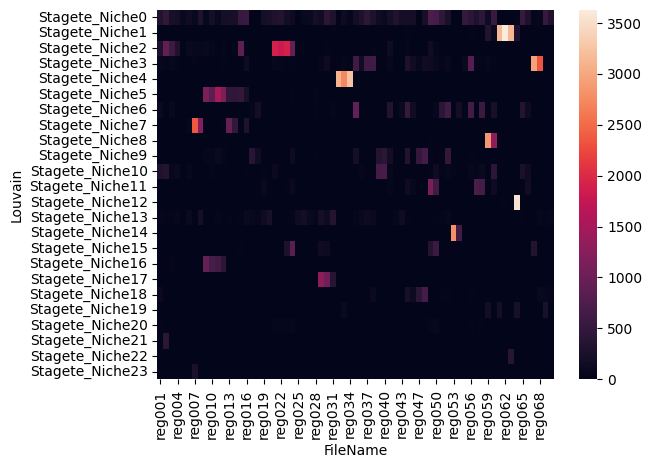

In [13]:
seaborn.heatmap(df_combined)

In [14]:
X = df_combined.T
X
clinical = pandas.read_csv('../../../Data/CODEX_CTCL/41467_2021_26974_MOESM3_ESM_-_Objects.csv',index_col=0).loc[:,['FileName','Groups','Patients']].reset_index()
Y = clinical[['FileName','Groups']].drop_duplicates()
Y.index = Y['FileName']
Y = Y['Groups']
idx = Y.index.isin(X.index)
Y = Y[idx]
Y.index.isin(X.index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [15]:
len(Y)

69

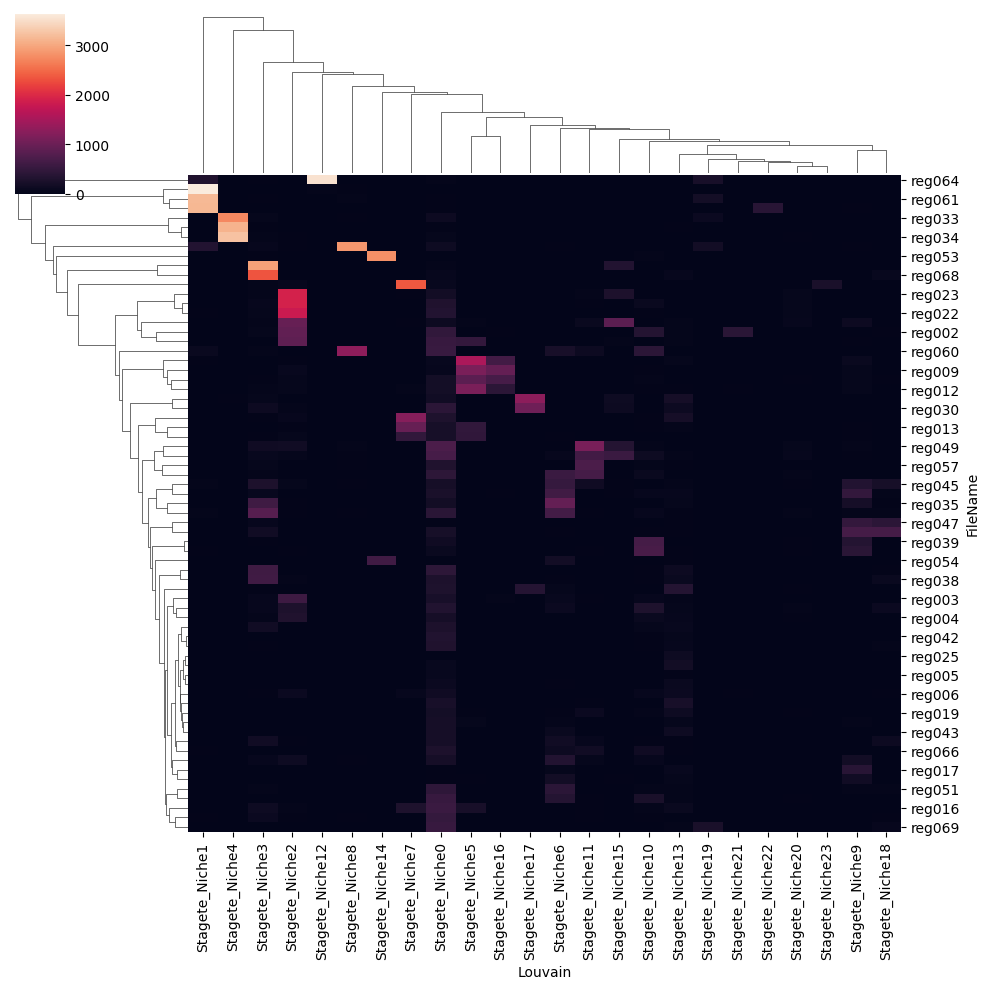

In [16]:
seaborn.clustermap(X)

# Machine learning model

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_with_features(X, Y, N_feat=30):
    
    # Setting up 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Creating the Logistic Regression model
    model = LogisticRegression(random_state=42, multi_class='ovr', max_iter=1000)

    # Performing cross-validation and computing the AUC scores for each fold
    cv_auc_scores = cross_val_score(model, X, Y, cv=cv, scoring='roc_auc_ovo')
    print(f"Cross-validated AUC scores: {cv_auc_scores}")
    print(f"Average AUC Score: {cv_auc_scores.mean()} ± {cv_auc_scores.std()}")


    # Splitting the dataset into training and testing sets for feature importance analysis
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train, Y_train)

    # Getting feature coefficients (importances)
    feature_importances = model.coef_[0]

    # Creating a DataFrame to view the feature importances more easily
    features_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Sorting the DataFrame based on feature importance and selecting the top N_feat
    sorted_features_df = features_df.sort_values(by='Importance', ascending=False).head(N_feat)

    # Plotting
    plt.figure(figsize=(10, 8))
    sorted_features_df['grp'] = sorted_features_df['Feature'].str[:4]
    sns.barplot(data=sorted_features_df, x='Importance', y='Feature', hue='grp', palette=sns.color_palette("hsv", len(sorted_features_df['grp'].unique())))
    plt.title('Top N_feat Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    return sorted_features_df


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was d

Cross-validated AUC scores: [0.7494213  0.62037037 0.76666667 0.86666667 0.89583333]
Average AUC Score: 0.7797916666666668 ± 0.0974912393623168


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


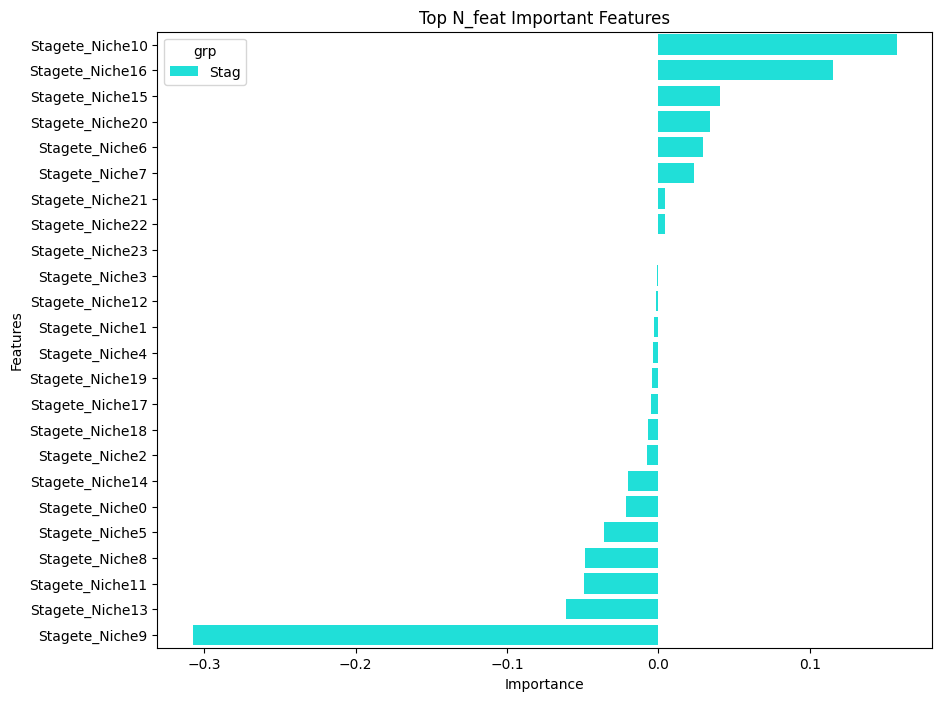

,Feature,Importance,grp
10,Stagete_Niche10,0.157714,Stag
16,Stagete_Niche16,0.115575,Stag
15,Stagete_Niche15,0.040467,Stag
20,Stagete_Niche20,0.034148,Stag
6,Stagete_Niche6,0.029664,Stag
7,Stagete_Niche7,0.023389,Stag
21,Stagete_Niche21,0.004611,Stag
22,Stagete_Niche22,0.004434,Stag
23,Stagete_Niche23,-0.000016,Stag
3,Stagete_Niche3,-0.001017,Stag


In [24]:
evaluate_model_with_features(X,Y)